# California Housing Prediction


## Step 0 - Imports and Reading Data


In [9]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt # plots
import seaborn as sns # plots 
plt.style.use('ggplot')
# pd.set_option('max_columns', 200)

In [11]:
df = pd.read_csv("../data/housing.csv")

## Step 1: Data Understanding
- shape
- head/tail
- dtypes
- describe

In [ ]:
# show dimensionality of data (rows, cols)
df.shape

(20640, 10)

In [ ]:
# first five entries, see what data looks like
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [ ]:
# if df has lots of columns, and show them all
# df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [21]:
# show the data types of all cols
df.dtypes

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object

In [23]:
# some statistical info about our data, can come in useful for any stat calcs
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


# Step 2: Data Prep
- drop irrelevant cols
- find duplicate cols
- rename cols
- feature creation

In [ ]:
# show all the columns and decide what's important/not

df.columns

# no dropping any cols, bc they are all relevant to predictig median_house_value
# column drop example
# df.drop(['median_income'], axis=1)
# OR we can rewrite the df with the list of accepted columns
# EX: df = df[[longitude', 'latitude', 'housing_median_age', 'total_rooms',
#       'total_bedrooms', 'population', 'households',
#      'median_house_value', 'ocean_proximity']].copy()


Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

#### All cols matter/look important. No changes made

In [72]:
# Column renaming
# no spaces, consistent capitalization
# df.columns
# ex
# df.rename(columns={'total_rooms':'rooms_in_block'}) (for later reference)


In [ ]:
# get amt of missing vals
df.isna().sum()
# this will matter later for ML model

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

#### small missingness in total bedrooms, will impute median values when time comes for modeling 

In [71]:
# check duplicates
df[df.duplicated()] 
# no duplicates

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity


# Step 3: Feature Understanding

(Univariate analysis)
- Plotting feature distributions
    - Histogram
    - KDE
    - Boxplot

Text(0.5, 0, 'Median House Value (USD)')

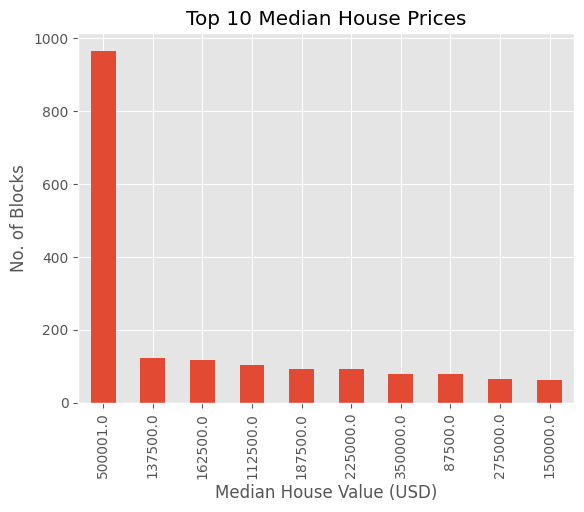

In [73]:
ax = df['median_house_value'].value_counts() \
    .head(10) \
    .plot(kind='bar', title='Top 10 Median House Prices')

ax.set_ylabel("No. of Blocks")
ax.set_xlabel("Median House Value (USD)")


Text(0.5, 0, 'Price (USD)')

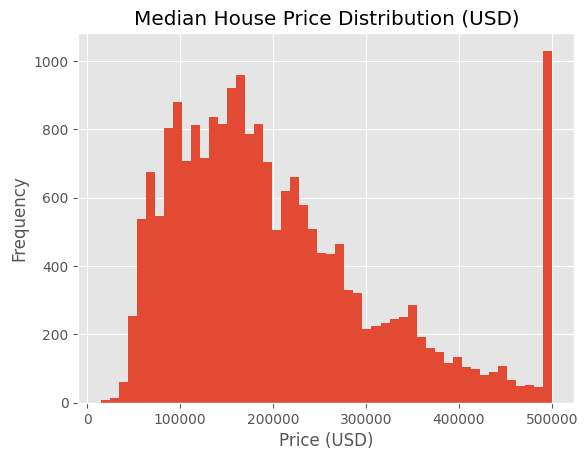

In [61]:
ax = df['median_house_value'].plot(kind='hist', bins=50, title='Median House Price Distribution (USD)')
ax.set_xlabel("Price (USD)")

#### looks like the census for 1990 had a max of 500000, which explains why there's such a skewed amount for 500k

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

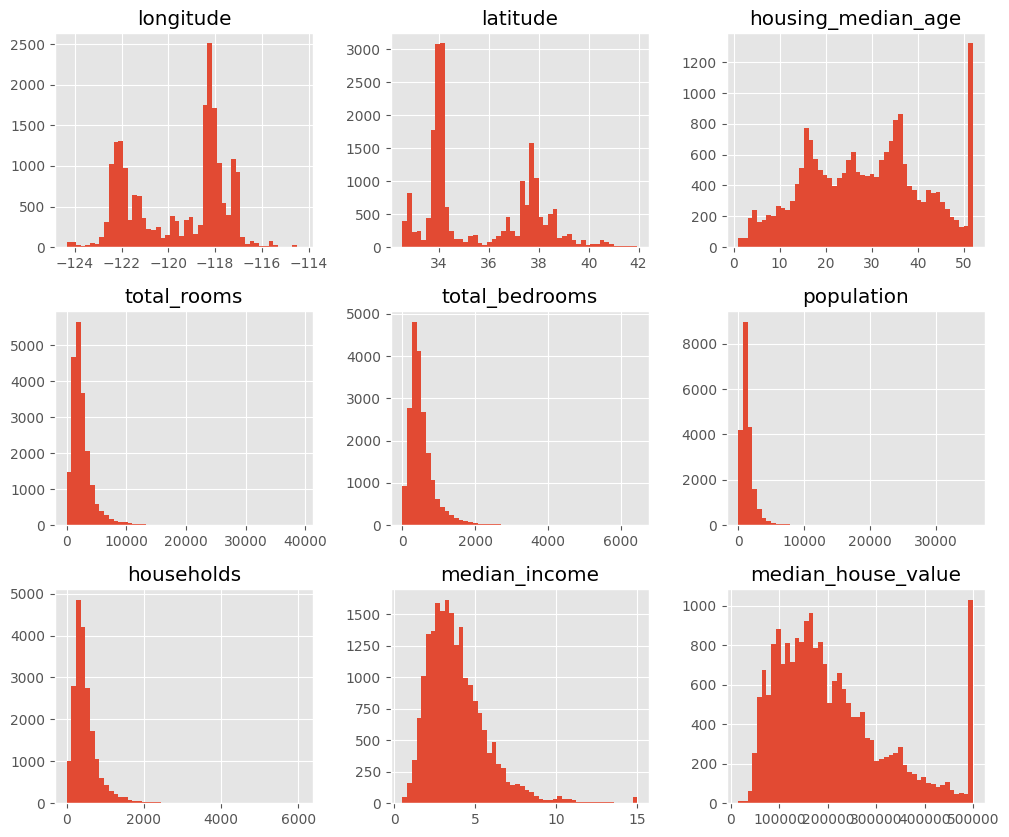

In [77]:
# the rest of the cols
df.hist(figsize=(12, 10), bins=50)

#### Total rooms, bedrooms, popuilation, households, and median income all show a clear right skew. longitutde and latitude have trends towards the middle. This could have to do with possible hotspots since we're dealing with proximity to the beach but more exploration is required to draw that conclusion. Will observe with a heatmap later. Mewdian househould value and hosuehold age have that outlier, once again assuming because of the artificla cap from the census.

#### Now, I will focus the majority of my graphs on the target column (median_house_value) and relationships it may have with others,

Text(0.5, 0, 'Price (USD)')

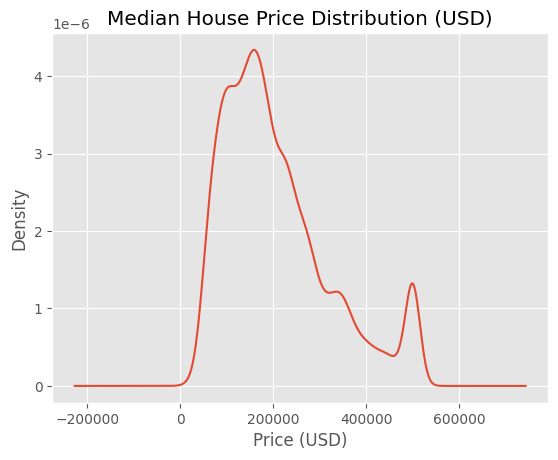

In [64]:
ax = df['median_house_value'].plot(kind='kde', title='Median House Price Distribution (USD)')
ax.set_xlabel("Price (USD)")

#### A huge preak at around 190k and then the 500k cap 

Text(0, 0.5, 'Price (USD)')

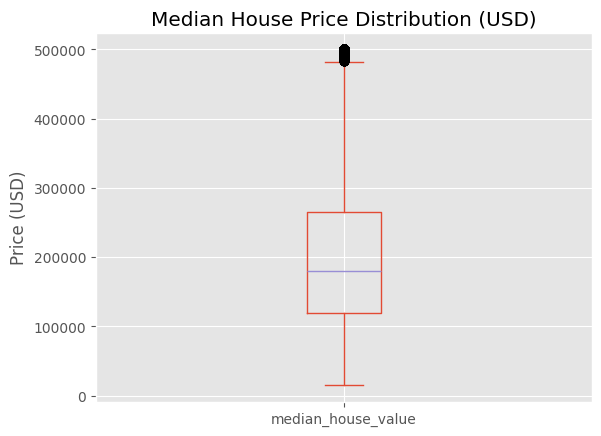

In [67]:
ax = df['median_house_value'].plot(kind='box', title='Median House Price Distribution (USD)')
ax.set_ylabel("Price (USD)")

#### The boxplot reinfornces tis conclusion

# Step 4: Feature Relationships
- scatterplot
- heatmap correlation
- pairplot
- groupby comparisons

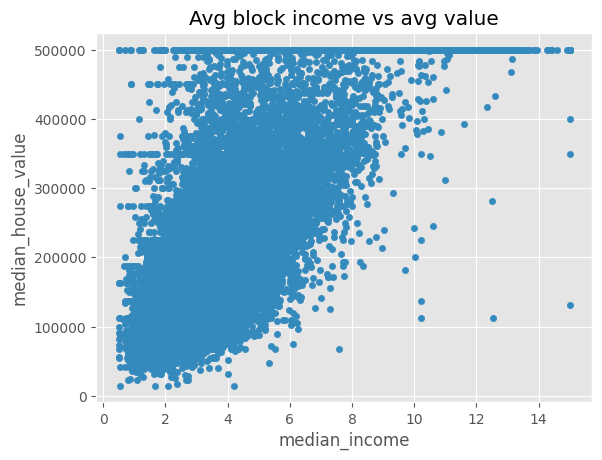

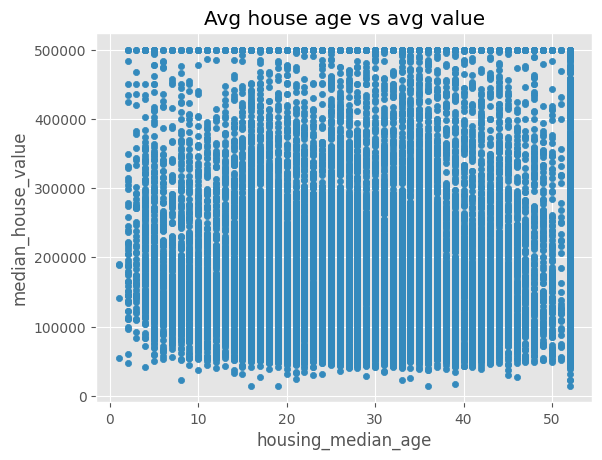

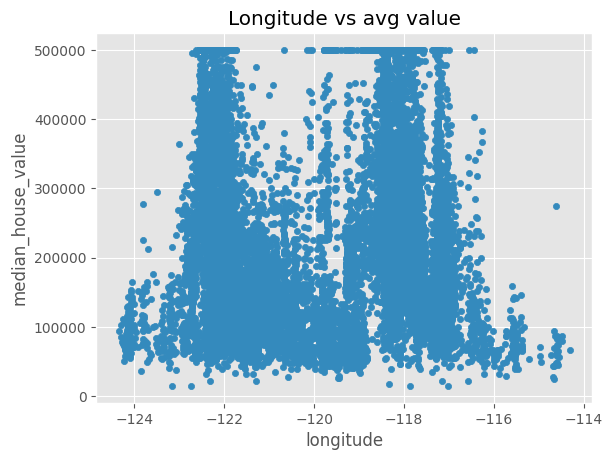

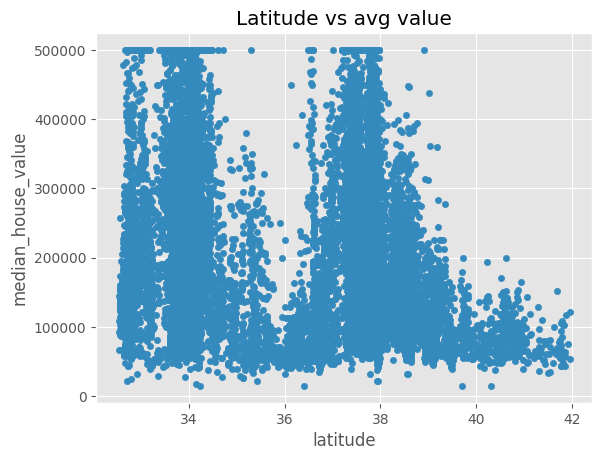

In [84]:
df.plot(kind='scatter', x = 'median_income', y = 'median_house_value', title="Avg block income vs avg value")
df.plot(kind='scatter', x = 'housing_median_age', y = 'median_house_value', title="Avg house age vs avg value")
df.plot(kind='scatter', x = 'longitude', y = 'median_house_value', title="Longitude vs avg value")
df.plot(kind='scatter', x = 'latitude', y = 'median_house_value', title="Latitude vs avg value")
plt.show()

#### There is a clear correlation between median house value and mean income. However, there seems to be no relationship between age and value. Longitude and latitude are similar, showing peaks at their respective middle left and right values. This may suggest plots of land that are more friendly to housing spaces